#**Overview**

This script allows users to upload an image, processes the image to enhance text detection, identifies text regions using Tesseract OCR, highlights these regions with bounding boxes, and finally extracts and displays the detected text. It's a practical example of integrating computer vision and OCR techniques to automate text recognition from images.

#**Installing and Importing Necessary Libraries**

Installs the Tesseract OCR engine and the Python wrapper (pytesseract) in the Colab environment.

**cv2:** OpenCV for image processing (reading, modifying, displaying).

**numpy:** Supports array operations on images.

**pytesseract:** Python wrapper for Tesseract OCR, used for text recognition.

**cv2_imshow:** Displays images in Colab.

**files:** Allows uploading of files in Colab.

**os:** Used to manage file paths.

In [44]:

pip install pytesseract 

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2          # For image processing
import numpy as np   
import pytesseract   # For Optical Character Recognition (OCR)
import os           
import matplotlib.pyplot as plt  

# Set tesseract path (adjust this if installed in a different location)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

#**Defining Helper Functions**

##**Preprocessing the Image**

Converts the image to grayscale, denoises it, and applies binary thresholding for easier text detection.

In [47]:
# ---------- Preprocessing Function ----------
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Increase contrast
    contrast = cv2.convertScaleAbs(gray, alpha=1.5, beta=0)

    # Denoise
    denoised = cv2.fastNlMeansDenoising(contrast, h=30)

    # Apply adaptive threshold (better for uneven lighting)
    thresh = cv2.adaptiveThreshold(denoised, 255, 
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY, 31, 10)
    return thresh


##**Detecting Text Regions**

Detects text regions in the image and returns information like position, confidence, and text content in a dictionary.

In [48]:
# ---------- Detect Text Regions ----------
def detect_text_regions(image):
    boxes = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)  # Get text region data
    return boxes

##**Drawing Bounding Boxes**

Draws bounding boxes around text regions with confidence scores above 60%.

In [49]:
# ---------- Draw Bounding Boxes ----------
def draw_bounding_boxes(image, boxes):
    output = image.copy()  # Copy original image to draw boxes
    n_boxes = len(boxes['level'])  # Total number of detected text regions
    for i in range(n_boxes):
        if int(boxes['conf'][i]) > 60:  # Only consider boxes with confidence > 60%
            (x, y, w, h) = (boxes['left'][i], boxes['top'][i], boxes['width'][i], boxes['height'][i])
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle
    return output

##**Extracting Detected Text**

Extracts and combines the detected text into a single string.

In [50]:

# ---------- Extract Detected Text ----------
def get_detected_text(boxes):
    detected_text = []
    n_boxes = len(boxes['level'])  # Total number of detected boxes
    for i in range(n_boxes):
        if int(boxes['conf'][i]) > 30:
            detected_text.append(boxes['text'][i])  # Append detected text
    return ' '.join(detected_text)

#**Uploading and Reading the Image**

Prompts the user to upload an image, retrieves the file, and reads it using OpenCV.

In [51]:
# ---------- Image Path ----------
image_path = "images.jpg"  # Replace with your local image path

# ---------- Read Image ----------
image = cv2.imread(image_path)

#**Processing and Displaying Results**

Displays the original image, preprocesses it, detects text regions, draws bounding boxes, and prints the extracted text.



Original Image:


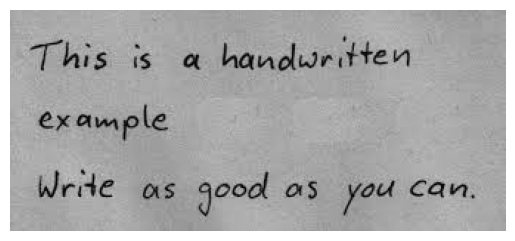


Image with Text Detection Regions:


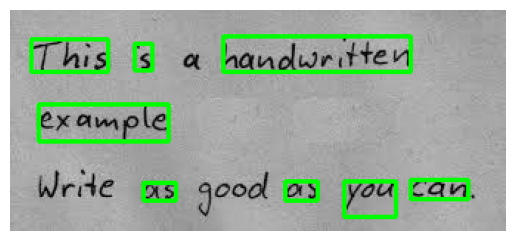


Detected Text:
This is a@ handwritten example as gooal as you can


In [52]:

# ---------- Check if Image Loaded ----------
if image is None:
    print(f"Error: Unable to read the image file: {image_path}")
else:
    # Display original image
    print("\nOriginal Image:")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Preprocess and Detect
    preprocessed = preprocess_image(image)
    boxes = detect_text_regions(preprocessed)

    # Draw bounding boxes
    image_with_boxes = draw_bounding_boxes(image, boxes)

    # Display image with bounding boxes
    print("\nImage with Text Detection Regions:")
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Extract and print detected text
    detected_text = get_detected_text(boxes)
    print("\nDetected Text:")
    print(detected_text)
